수치를 입력해서 수치를 예측하는 모델들에 대해서 알아보겠습니다. 수치예측을 위한 데이터셋 생성을 해보고, 선형회귀를 위한 가장 간단한 퍼셉트론 신경망 모델부터 깊은 다층퍼셉트론 신경망 모델까지 구성 및 학습을 시켜보겠습니다

---
### 데이터셋 준비

입력 x에 대해 2를 곱해 두 배 정도 값을 갖는 출력 y가 되도록 데이터셋을 생성해봤습니다. 선형회귀 모델을 사용한다면 Y = w * X + b 일 때, w가 2에 가깝고, b가 0.16에 가깝게 되도록 학습시키는 것이 목표입니다.

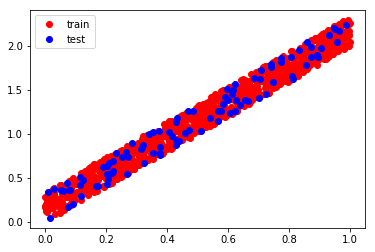

In [20]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_5.png)

---
### 레이어 준비

본 장에서 사용되는 블록들은 다음과 같습니다.

|블록|이름|설명|
|:-:|:-:|:-|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|Input data, Labels|1차원의 입력 데이터 및 라벨입니다.|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|Dense|모든 입력 뉴런과 출력 뉴런을 연결하는 전결합층입니다.|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|relu|활성화 함수로 주로 은닉층에 사용됩니다.|

---
### 모델 준비

수치예측을 하기 위해 `선형회귀 모델`, `퍼셉트론 신경망 모델`, `다층퍼셉트론 신경망 모델`, `깊은 다층퍼셉트론 신경망 모델`을 준비했습니다.

#### 선형회귀 모델

가장 간단한 1차 선형회귀 모델로 수치예측을 해보겠습니다. 아래 식에서 x, y는 우리가 만든 데이터셋이고, 회귀분석을 통해서, w와 b값을 구하는 것이 목표입니다. 

    Y = w * X + b
   
w와 b값을 구하게 되면, 임의의 입력 x에 대해서 출력 y가 나오는 데 이것이 예측 값입니다. w, b 값은 분산, 공분산, 평균을 이용하여 쉽게 구할 수 있습니다. 

    w = np.cov(X, Y, bias=1)[0,1] / np.var(X)
    b = np.average(Y) - w * np.average(X)
    
간단한 수식이지만 이 수식을 도출하기란 꽤나 복잡습니다. 오차를 최소화하는 극대값을 구하기 위해 편미분을 수행하고, 다시 식을 전개하는 등등의 과정이 필요합니다.

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_0.png)    

#### 퍼셉트론 신경망 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인 Y = w * X + b를 풀기 위한 모델입니다. 수치 예측을 하기 위해서 출력 레이어에 별도의 활성화 함수를 사용하지 않았습니다. w, b 값이 손으로 푼 선형회귀 최적해에 근접하려면 경우에 따라 만번이상의 에포크가 필요합니다. 실제로 사용하지는 않는 모델이지만 선형회귀부터 공부하시는 분들에게는 입문 모델로 나쁘지 않습니다.

    model = Sequential()
    model.add(Dense(1, input_dim=1))
        
![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_1m.png)

#### 다층퍼셉트론 신경망 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(1))

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_2m.png)

#### 깊은 다층퍼셉트론 신경망 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_3m.png)    

---
### 전체 소스

앞서 살펴본 `선형회귀 모델`, `퍼셉트론 신경망 모델`, `다층퍼셉트론 신경망 모델`, `깊은 다층퍼셉트론 신경망 모델`의 전체 소스는 다음과 같습니다. 

#### 선형회귀 모델

In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print w, b

# 3. 모델 평가하기
y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

2.00574308629 0.166691995049
mse : 0.0103976035867


#### 퍼셉트론 신경망 신경망 모델

Epoch 1/50
1000/1000 [==============================] - 0s - loss: 3.3772     
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 3.2768     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 3.1915     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 3.1096     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 3.0284     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 2.9489     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 2.8706     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 2.7936     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 2.7176     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 2.6425     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 2.5688     
Epoch 12/50
1000/1000 [==============================] - 0s - loss: 2.4959     
Epoch 13/50
1000/1000 [==========================

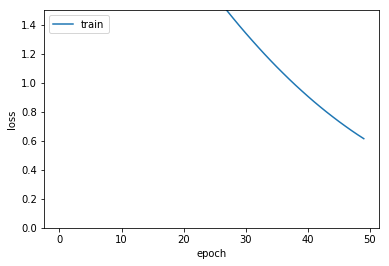

In [19]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)
w, b = model.get_weights()
print w, b

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

#### 다층퍼셉트론 신경망 모델

Epoch 1/50
1000/1000 [==============================] - 2s - loss: 0.9789      
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.6524     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.4222     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.2468     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.1298     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.0692     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.0481     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.0376     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 0.0274     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 12/50
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 13/50
1000/1000 [=========================

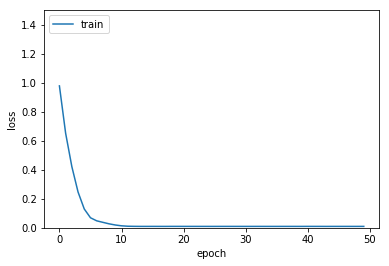

In [103]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

#### 깊은 다층퍼셉트론 신경망 모델

Epoch 1/50
1000/1000 [==============================] - 2s - loss: 1.0374     
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.3070     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.0581     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.0310     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.0199     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 12/50
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 13/50
1000/1000 [==========================

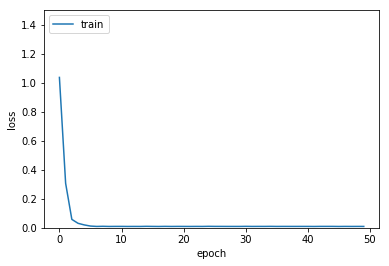

In [104]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

---

### 학습결과 비교

퍼셉트론 신경망 모델 > 다층퍼셉트론 신경망 모델 > 깊은 다층퍼셉트론 신경망 모델 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론 신경망 모델|다층퍼셉트론 신경망 모델|깊은 다층퍼셉트론 신경망 모델|
|:-:|:-:|:-:|
|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 요약

수치예측을 위한 퍼셉트론 신경망 모델, 다층퍼셉트론 신경망 모델, 깊은 다층퍼셉트론 신경망 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4m.png)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)
* 이전 : [순환 신경망 모델 만들어보기](https://tykimos.github.io/Keras/2017/04/09/RNN_Layer_Talk/)
* 다음 : [수치입력 이진분류 모델 레시피](https://tykimos.github.io/Keras/2017/08/13/Numerical_Input_Binary_Classification_Model_Recipe/)  